In [1]:
import pandas as pd
data=pd.read_excel("C:/Users/shreyas/AppData/Local/Temp/Rar$DIa10880.8296/Cryotherapy.xlsx")

In [2]:
data.head()

sex  age   Time  Number_of_Warts  Type  Area  Result_of_Treatment
0    1   35  12.00                5     1   100                    0
1    1   29   7.00                5     1    96                    1
2    1   50   8.00                1     3   132                    0
3    1   32  11.75                7     3   750                    0
4    1   67   9.25                1     1    42                    0

In [3]:
data.isnull().any()  #####To check if there any null values in the data

sex                    False
age                    False
Time                   False
Number_of_Warts        False
Type                   False
Area                   False
Result_of_Treatment    False
dtype: bool

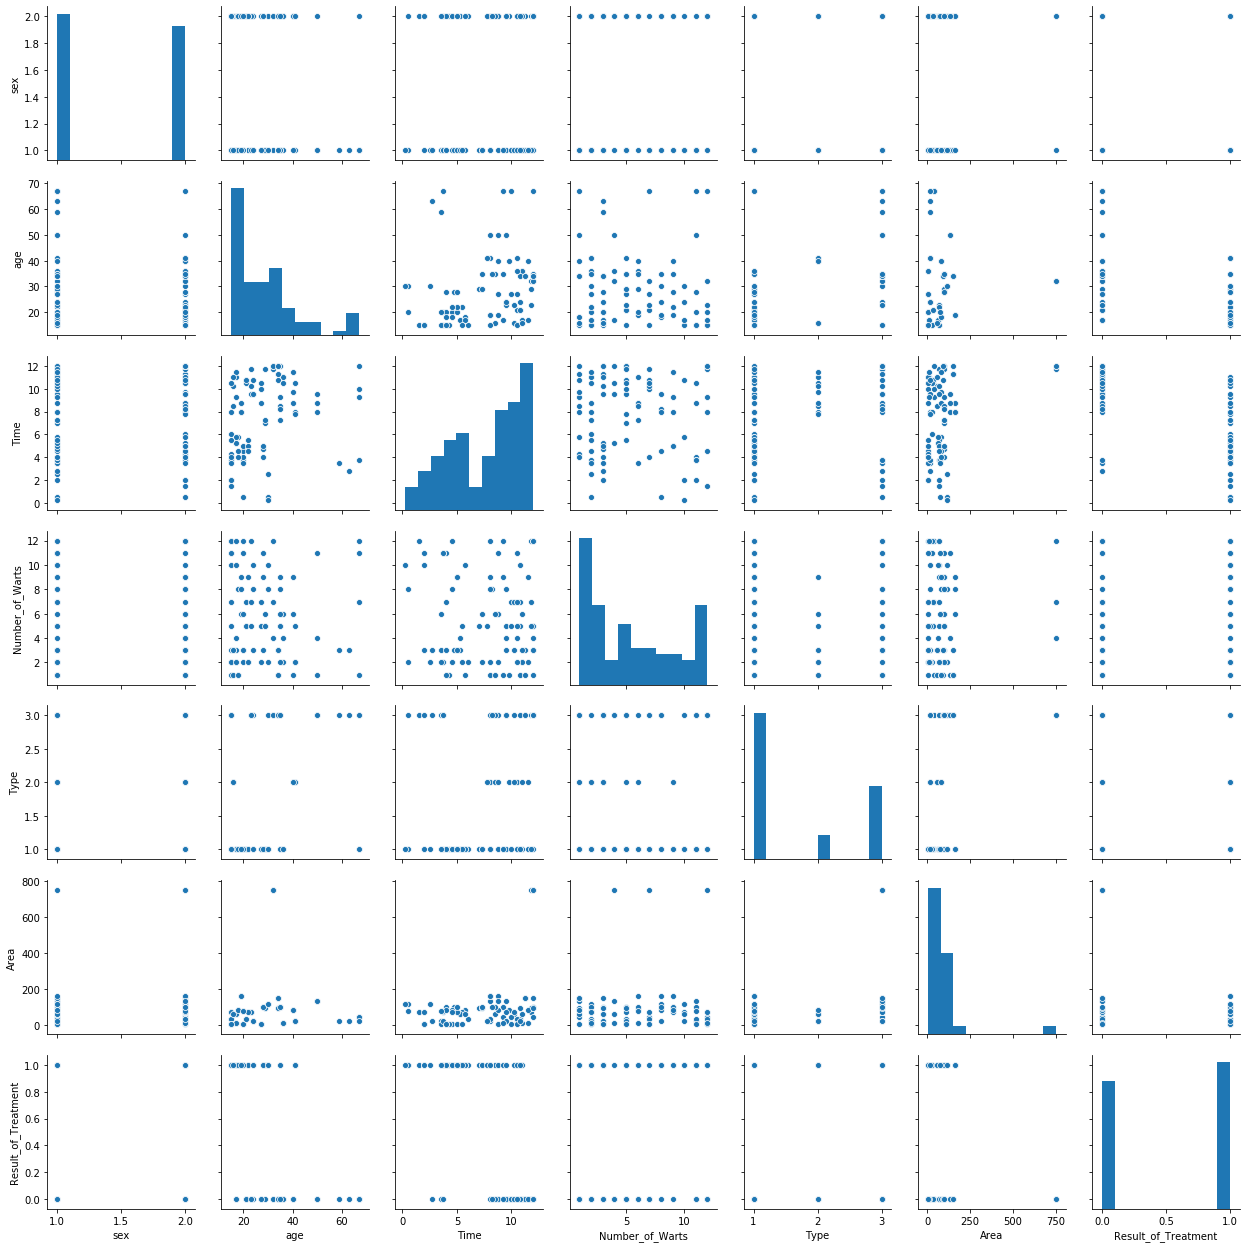

In [7]:
import seaborn as sns
sns.pairplot(data)

####As the data columns are not normally distributed we would go for logistic regression and not discriminant analysis###

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix

In [9]:
X=data.drop(['Result_of_Treatment'],axis=1)
y=data['Result_of_Treatment']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #########To divide the data into train and test####

In [11]:
log_reg=LogisticRegression()
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
log_reg.fit(X_train,y_train)
y_predict=log_reg.predict(X_test)
y_predict2=log_reg.predict(X_train)

C:\Users\shreyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
#####Model Performance###

confusion_matrix(y_train,y_predict2)

array([[27,  2],
       [ 5, 29]], dtype=int64)

In [14]:
confusion_matrix(y_test,y_predict)

array([[11,  2],
       [ 5,  9]], dtype=int64)

In [15]:
     ###Roc_curve###
roc_auc_score(y_test,y_predict)

0.7445054945054945

In [16]:
roc_auc_score(y_train,y_predict2)

0.8919878296146044